### 1.2 Descripción del problema de regresión.

Este dataset contiene variables independientes que corresponden a las características físicas y químicas de un conjunto de vinos, la variable dependiente es "Quality" (calidad) que determina la calidad de los vinos en un rango de 3 a 9 (por ejemplo una calidad de 9 es mayor a una calidad de 8).

### 2.2 Análisis exploratorio de datos (EDA) del problema de regresión.

In [6]:
%pip install ucimlrepo 

# Esta librería contiene el dataset de regresión.

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from ucimlrepo import fetch_ucirepo
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [8]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

df_reg = pd.concat([X, y], axis=1)
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [9]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [10]:
round(df_reg.describe(),2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


Text(0.5, 1.0, 'Matriz de Correlación del Dataset de Regresión')

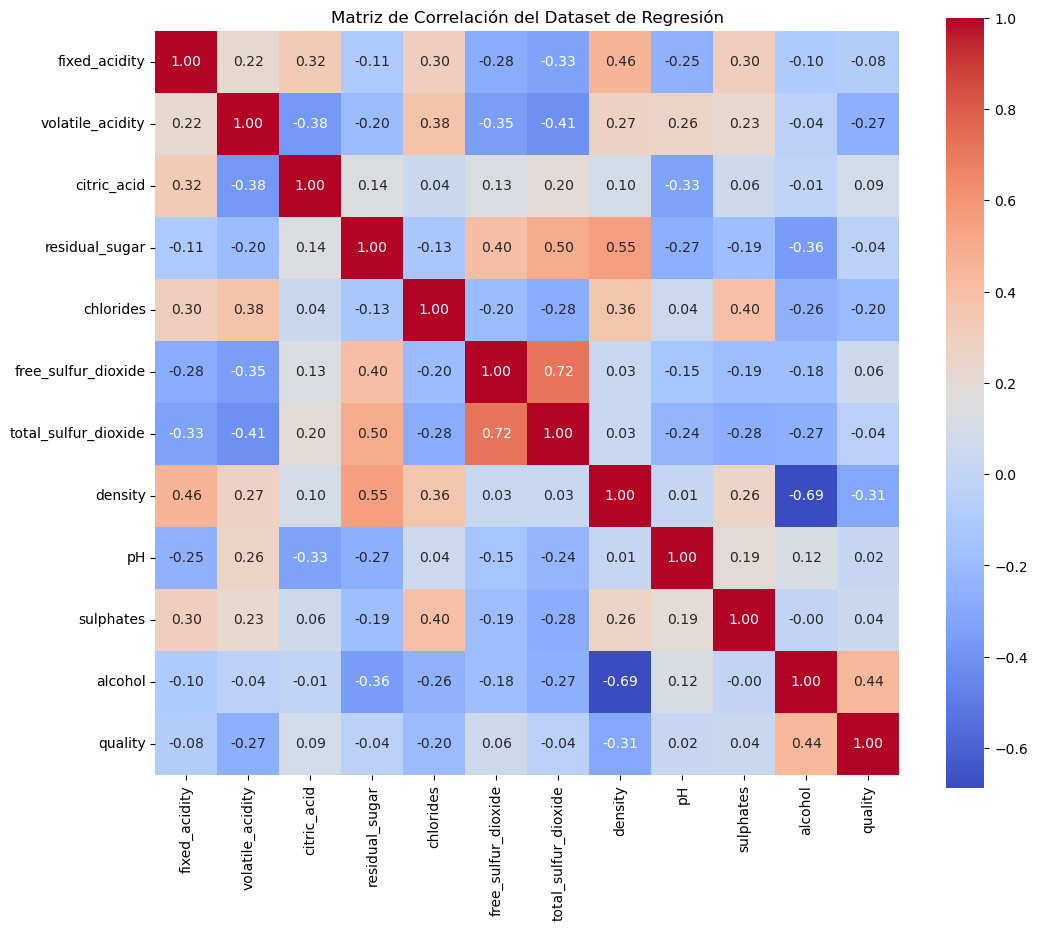

In [11]:
matriz_de_correlacion_reg = df_reg.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_de_correlacion_reg, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación del Dataset de Regresión')

No hay muchos coeficientes de correlación altos en la matriz de correlación, podemos usar SelectKBest con mutual_info_regression para ver qué pasa con un método de selección de características que considera relaciones no lineales.

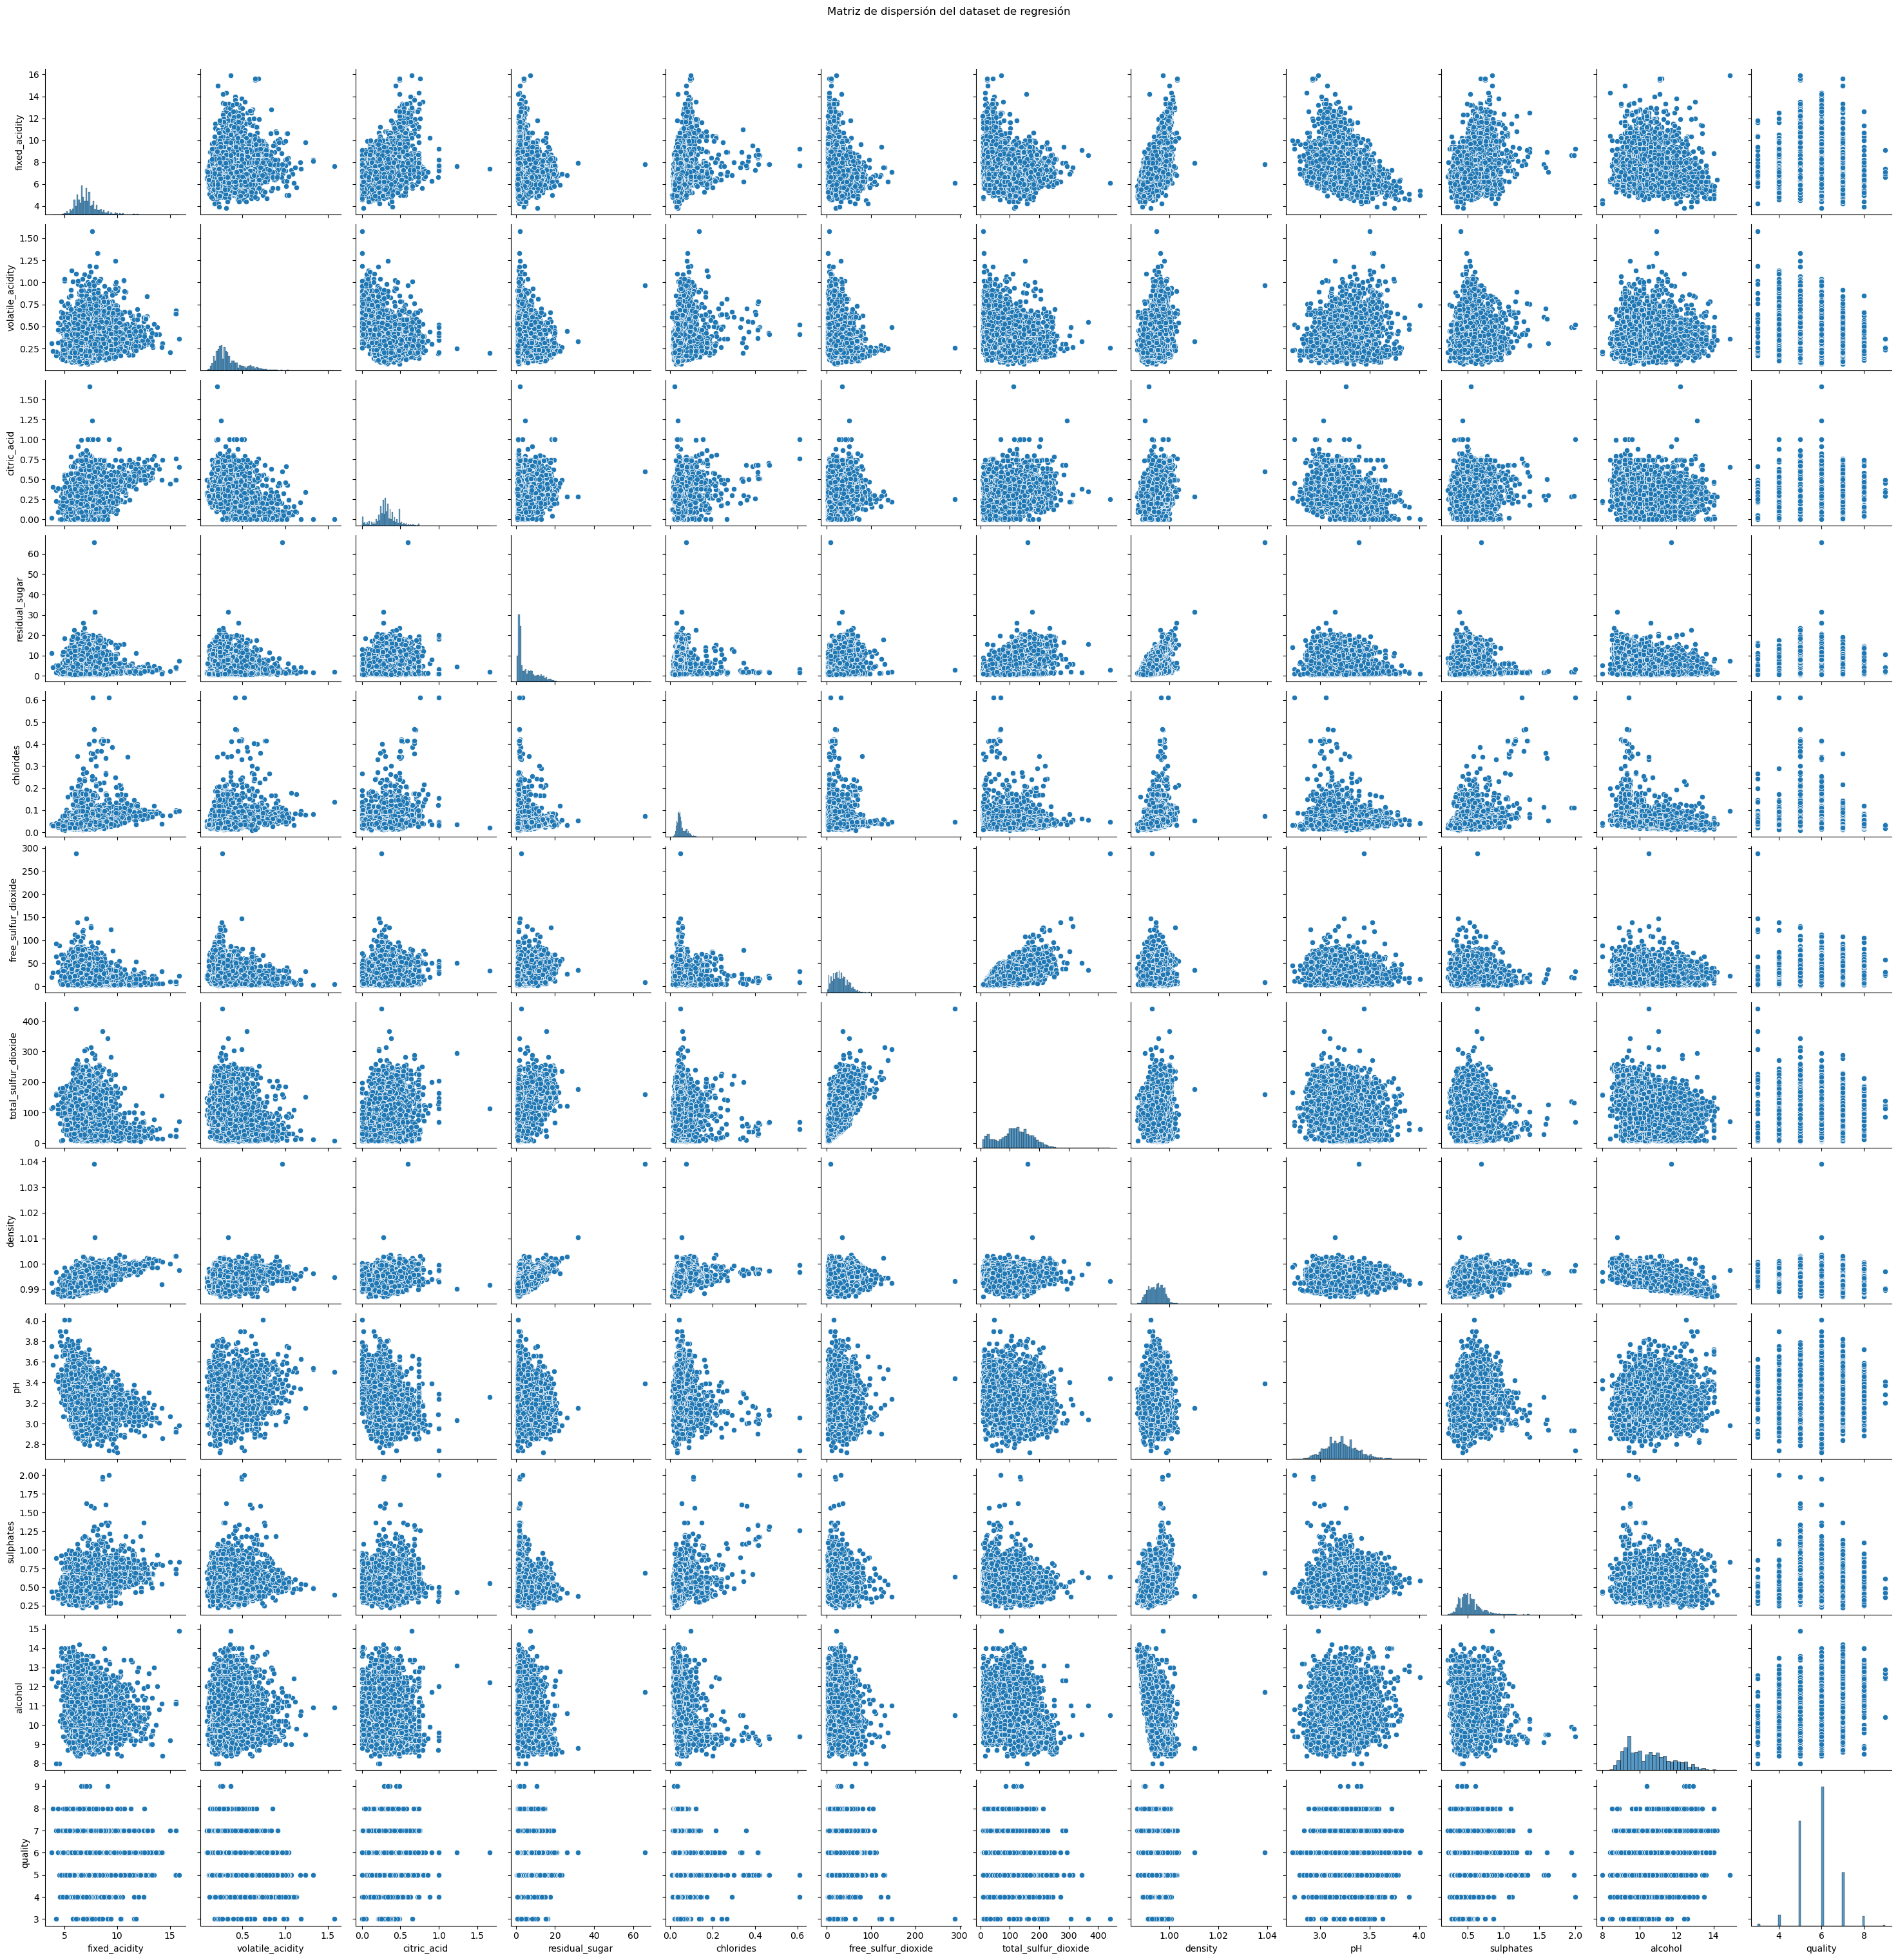

In [12]:
sns.pairplot(df_reg)
plt.suptitle("Matriz de dispersión del dataset de regresión", y=1.02)
plt.show()

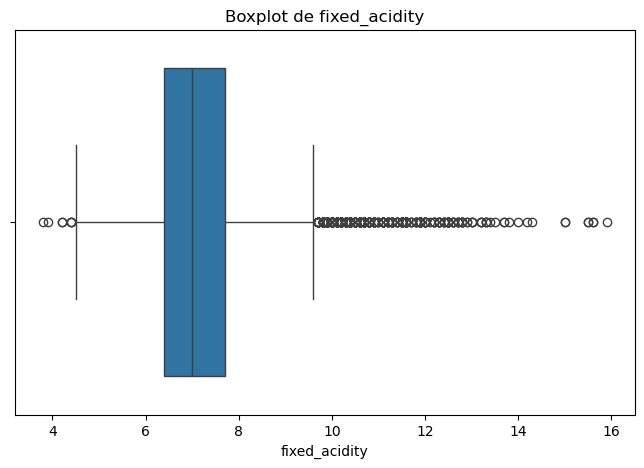

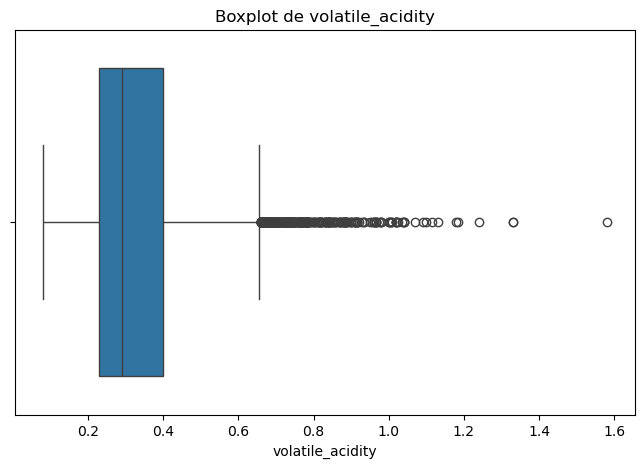

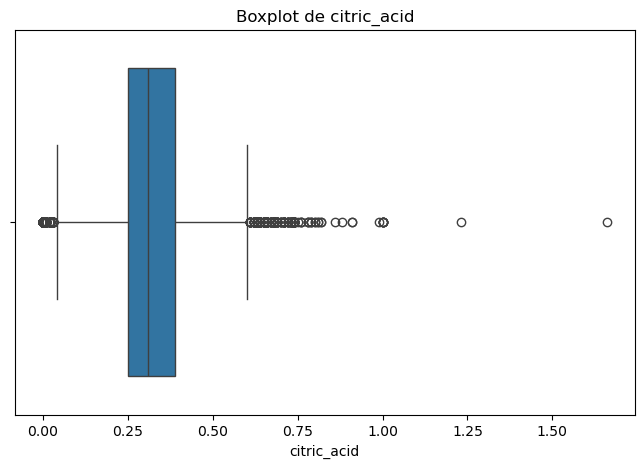

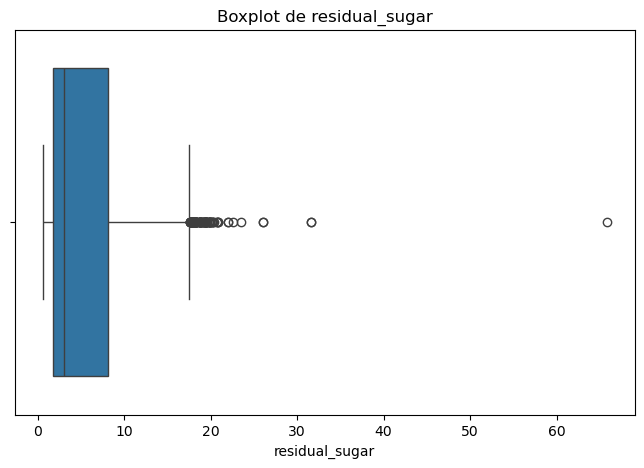

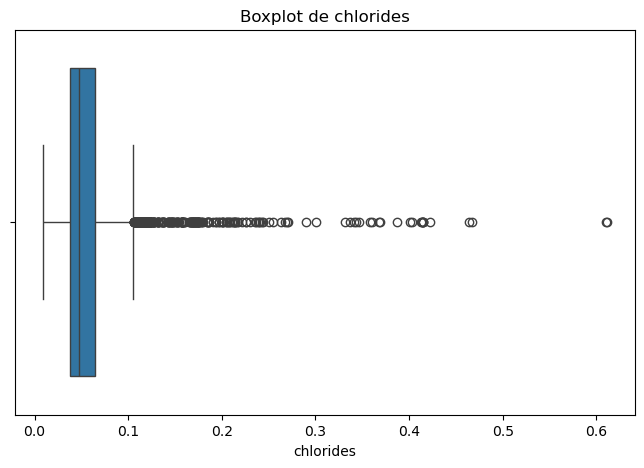

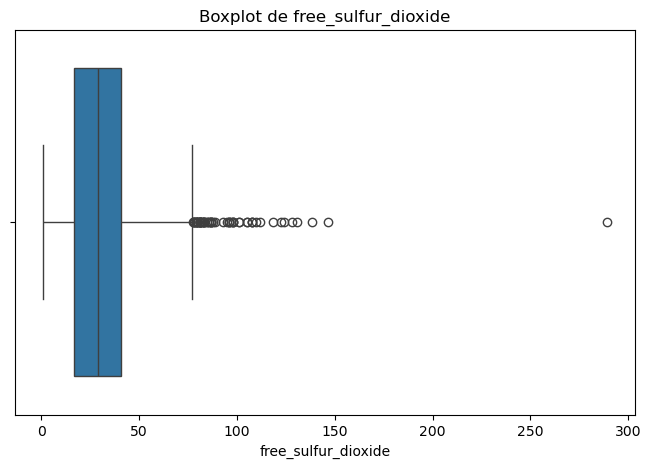

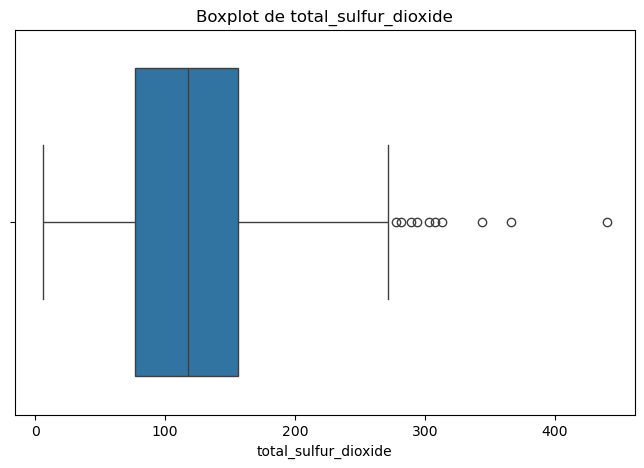

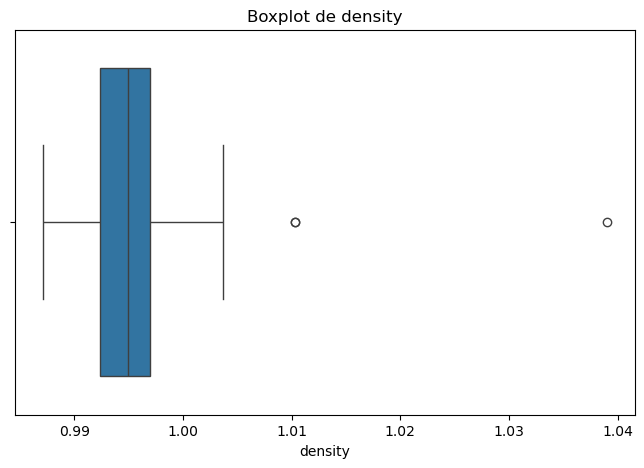

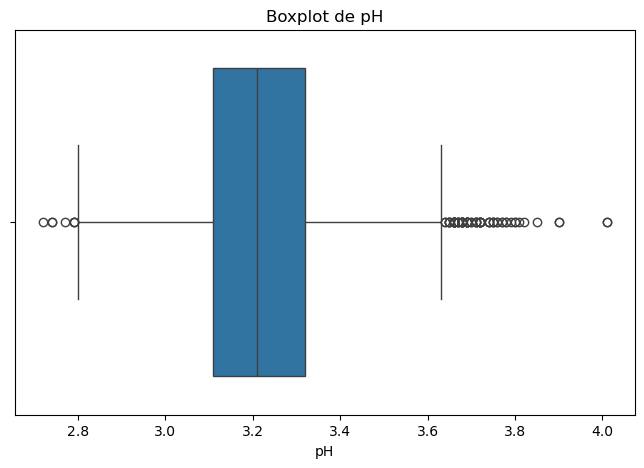

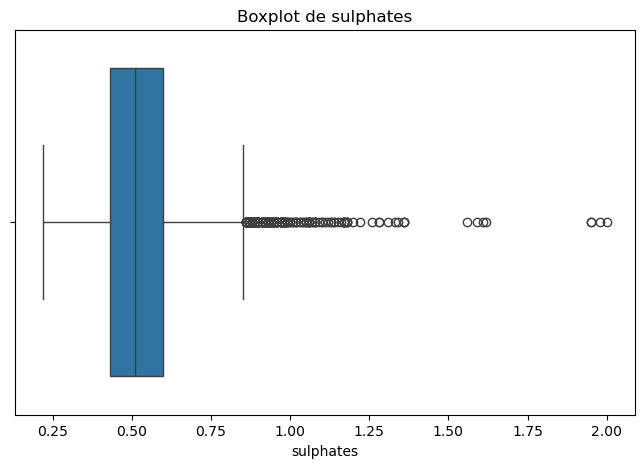

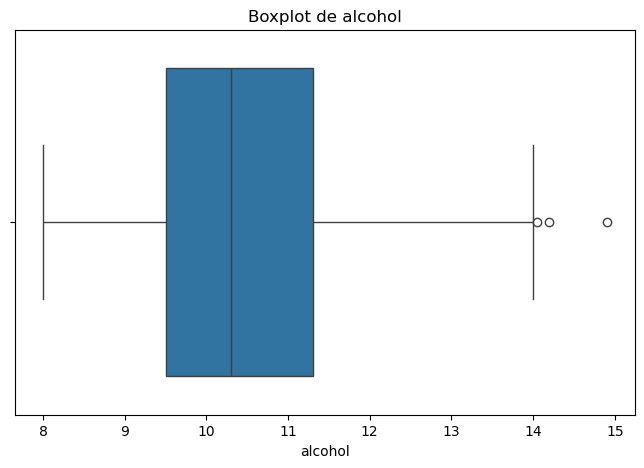

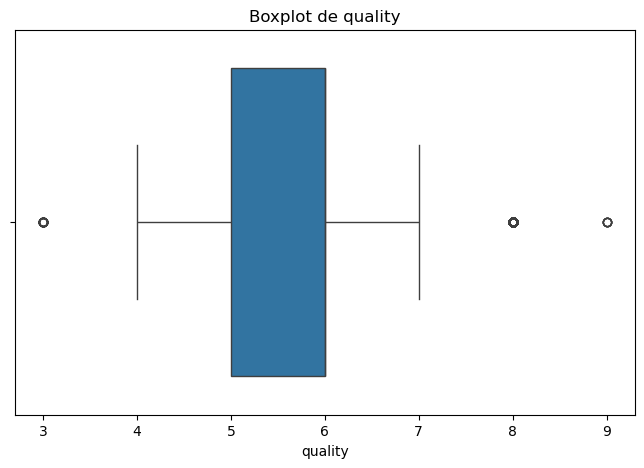

In [13]:
def boxplot_reg(df, column):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()  

for column in df_reg.columns:
    boxplot_reg(df_reg, column)

In [14]:
df_reg['quality'].nunique() 

7

In [15]:
round(df_reg.groupby('quality').size()/len(df_reg)*100,2)

quality
3     0.46
4     3.32
5    32.91
6    43.65
7    16.61
8     2.97
9     0.08
dtype: float64

Vemos que hay un desbalance de clases.

### 3.2 Preprocesamiento de datos para el problema de regresión.

In [16]:
array = df_reg.values
X = array[:, 0:-1] # Separamos del conjunto de datos la matriz X (variables independientes)
y = array[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[6.60e+00 2.40e-01 3.50e-01 ... 3.19e+00 3.70e-01 1.05e+01]
 [8.30e+00 2.80e-01 4.80e-01 ... 3.26e+00 6.20e-01 1.24e+01]
 [7.70e+00 7.15e-01 1.00e-02 ... 3.41e+00 5.70e-01 1.18e+01]
 ...
 [6.40e+00 3.70e-01 2.00e-01 ... 3.24e+00 4.30e-01 9.50e+00]
 [6.50e+00 2.60e-01 5.00e-01 ... 3.18e+00 4.70e-01 9.50e+00]
 [7.20e+00 6.20e-01 6.00e-02 ... 3.51e+00 5.40e-01 9.50e+00]]
[[ 7.    0.17  0.74 ...  3.26  0.38 12.2 ]
 [ 7.7   0.64  0.21 ...  3.27  0.45  9.9 ]
 [ 6.8   0.39  0.34 ...  3.18  0.44 12.  ]
 ...
 [ 6.6   0.16  0.35 ...  3.19  0.75 12.4 ]
 [ 6.6   0.39  0.38 ...  3.3   0.57  9.4 ]
 [ 7.4   0.16  0.27 ...  2.9   0.43  8.7 ]]
[5. 7. 6. ... 5. 5. 5.]
[8. 5. 7. ... 7. 6. 7.]


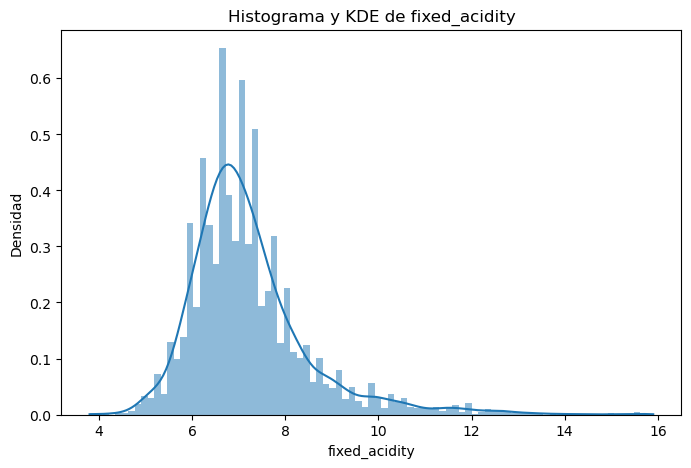

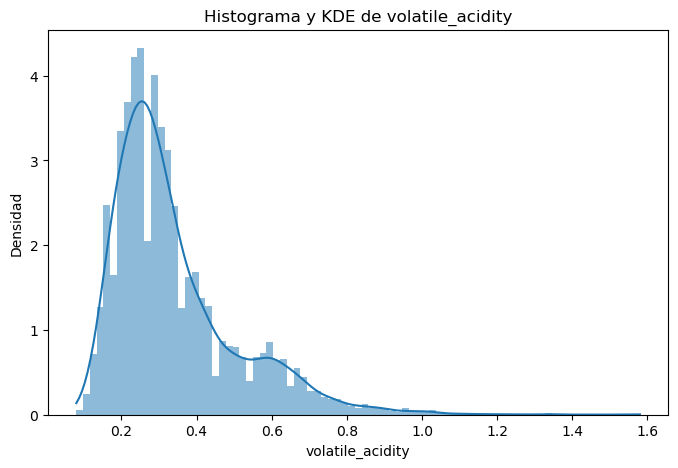

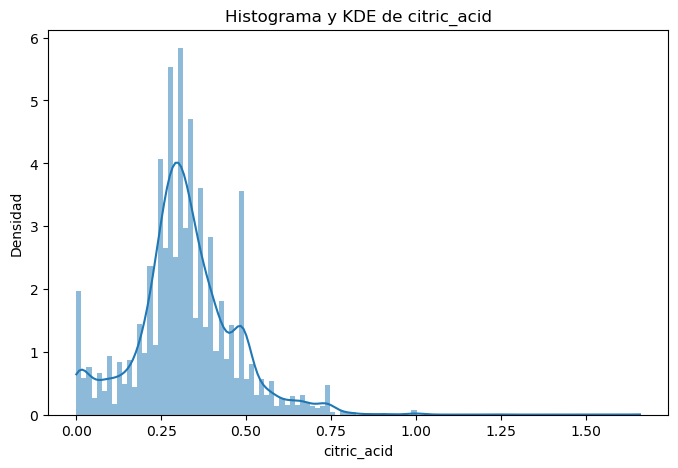

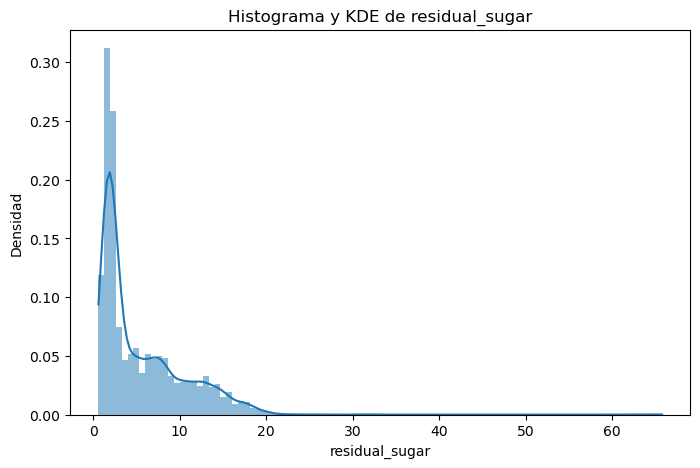

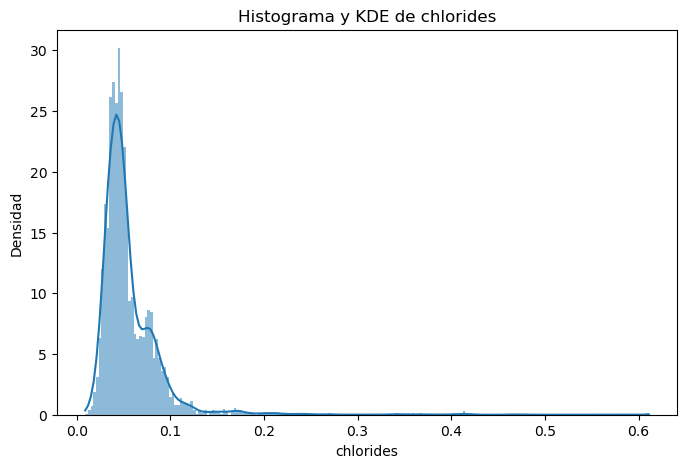

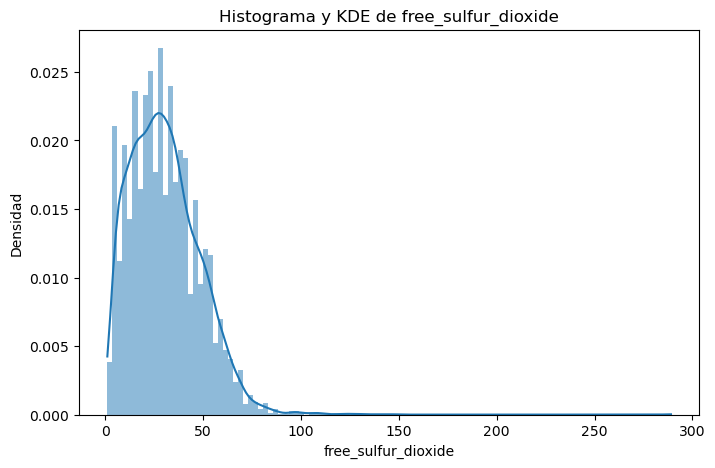

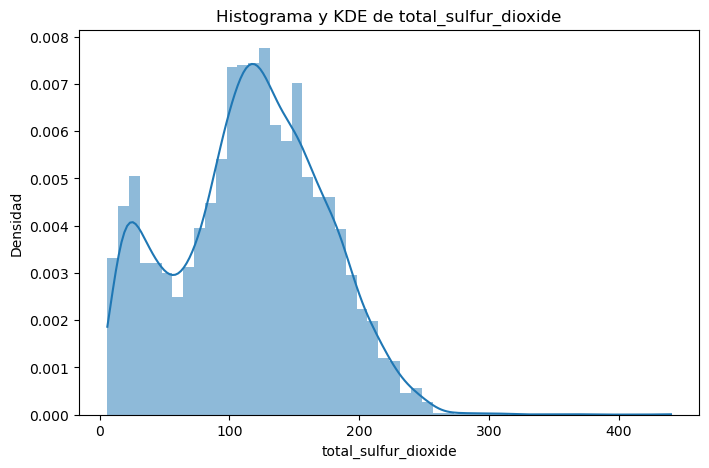

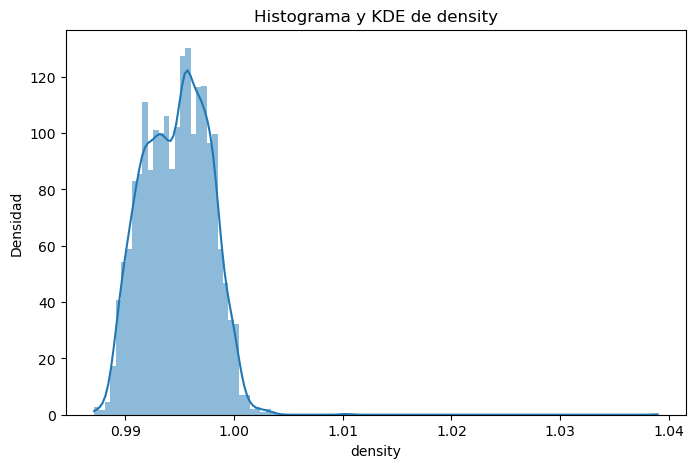

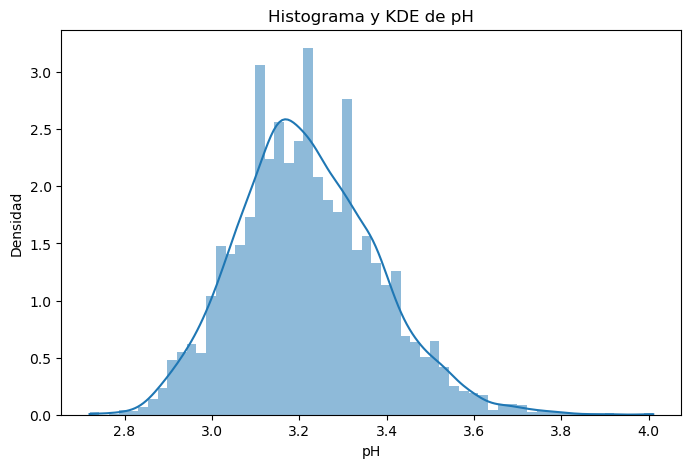

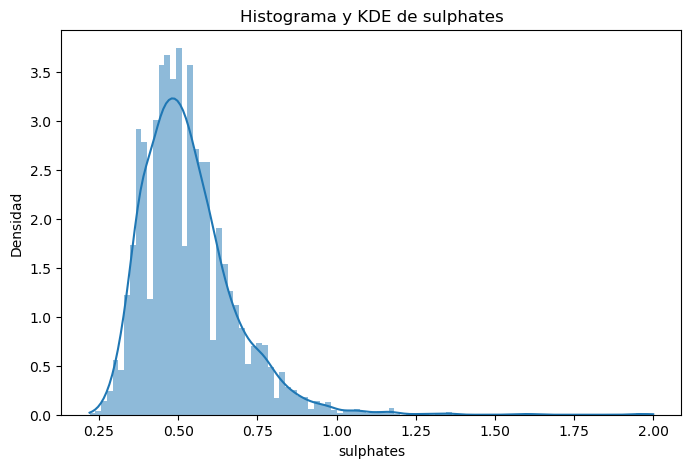

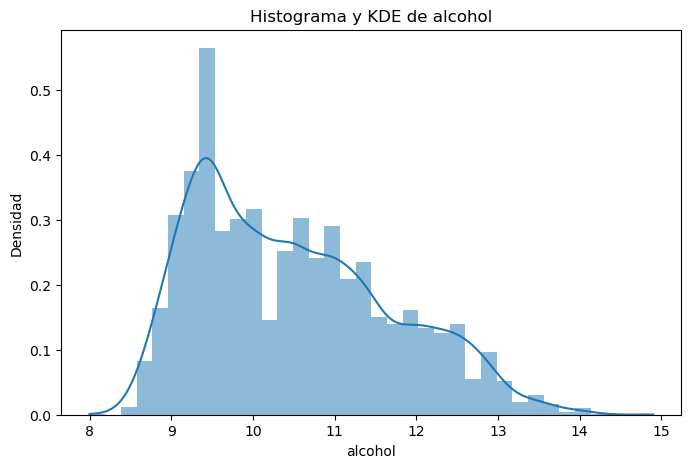

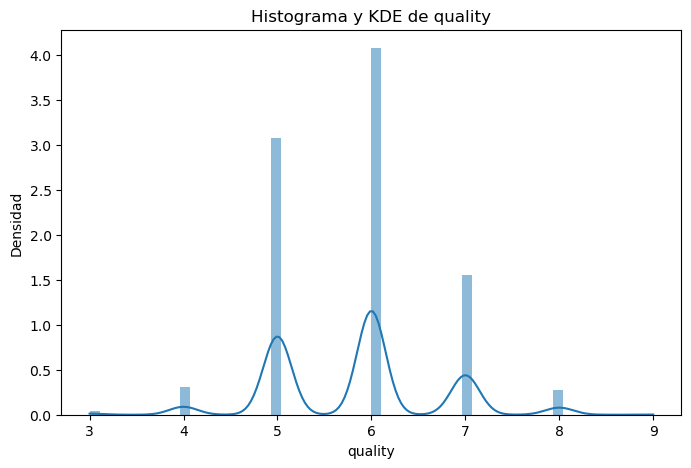

In [18]:
def histograma_kde(df, column):
    plt.figure(figsize=(8,5))
    sns.histplot(df[column], kde=True, stat="density", linewidth=0)
    plt.title(f"Histograma y KDE de {column}")
    plt.xlabel(column)
    plt.ylabel("Densidad")
    plt.show()  

for i in df_reg.columns:
    histograma_kde(df_reg, i)

In [ ]:
scaler = StandardScaler().fit(X_train)

X_train_rescaled = scaler.transform(X_train)
X_test_rescaled = scaler.transform(X_test)

np.set_printoptions(precision=2)

print(X_train_rescaled)
print(X_test_rescaled)

[[ 0.14  2.19 -2.19 ...  1.81  0.19 -0.92]
 [ 0.45  3.28 -2.19 ... -0.12  1.   -0.58]
 [ 0.45  2.55 -1.92 ...  0.26  0.8  -0.58]
 ...
 [-0.55 -0.61 -0.89 ... -1.42 -0.48 -0.92]
 [-1.32 -0.3  -0.13 ...  0.76 -1.02  1.94]
 [-0.94 -0.79  0.42 ...  0.26 -1.42  1.1 ]]


In [ ]:
selecc = SelectKBest(score_func = mutual_info_regression, k=4) 
fit = selecc.fit(X_train, y_train)  

print(df_reg.columns)

print(fit.scores_)

caract = fit.transform(X_train) 

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.01 0.05 0.05 0.07 0.06 0.04 0.08 0.14 0.02 0.03 0.16]
